In [14]:
import tweepy                 #An easy-to-use Python library for accessing the Twitter API.

#TextBlob--> library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks 
#such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
from textblob import TextBlob

#Many times you might have seen a cloud filled with lots of words in different sizes,
#which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  #their awesome visualizations.

In [15]:
#twitter API credentials
consumer_key ="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [16]:
#create Authenticate object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

#set access token and access_token_secret
authenticate.set_access_token(access_token, access_token_secret)

#create api object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [33]:
#Extract 100 tweets from twitter user

def get_user(user,tweetNo):
    posts= api.user_timeline(screen_name=user, count=tweetNo, lang="en", tweet_mode="extended")
    return posts

    
user=input("enter name of user: ")
tweetNo=input("enter no of tweets: ")
posts = get_user(user,tweetNo)

#prints last 5 from this acc
for tweet in posts:
    print(tweet.full_text +'\n')

enter name of user: imVkohli
enter no of tweets: 25
Do try this at home! 😄 
https://t.co/s5ECbTCmnJ #one8Fragrances https://t.co/JZCYzH6Fmu

Loved this moving story told in a brilliant way. Bhai behen on fire @AnushkaSharma #KarneshSharma 😃❤️. Out now, please don't miss it guys. @OfficialCSFilms https://t.co/qQqNKQnWJn

Nothing comes close to playing an intense game in whites. What a blessing to be able to play test cricket for India. 🇮🇳💙 https://t.co/43OxdpYcFz

Here's what I'm doing when I'm not training. Gaming on the MPL App! 🤓 Play all your favourites out of more than 40 games available on the app and don't forget to create your Fantasy teams on @PlayMPL as well. 👊🏼 Download now from https://t.co/iJDdxKfsqz https://t.co/W7Fos8GYWq

Throwback to when you could go to such beautiful spots in nature. Just to be able to sit together and just soak it all in. With my one and only ❤️❤️❤️ https://t.co/AsyxoICMqv

We've lost a legend in Rajinder Goel Ji. Him being the highest wicket-taker i

In [34]:
#create a dataFrame

df= pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show fir 5 rws

df.head()

,Tweets
0,Do try this at home! 😄 \nhttps://t.co/s5ECbTCm...
1,Loved this moving story told in a brilliant wa...
2,Nothing comes close to playing an intense game...
3,Here's what I'm doing when I'm not training. G...
4,Throwback to when you could go to such beautif...


In [35]:
#clean the data/text

#fn to clean tweets

def cleantext(text):                #r tells pattern is raw string
    text= re.sub(r'@[A-Za-z0-9]+','',text)  #remove all after @ A-Za-z0-9---> remove @mention
    text=re.sub(r'#' , '',text)      #remove hashtag
    text= re.sub(r'RT[\s]+','',text)         #remove retweets
    text=re.sub(r'https?:\/\/\S+','',text)          #remove hyper link
    return text

In [36]:
#cleaning the text
df['Tweets']=df['Tweets'].apply(cleantext)

#show clean data
df


,Tweets
0,Do try this at home! 😄 \n one8Fragrances
1,Loved this moving story told in a brilliant wa...
2,Nothing comes close to playing an intense game...
3,Here's what I'm doing when I'm not training. G...
4,Throwback to when you could go to such beautif...
5,We've lost a legend in Rajinder Goel Ji. Him b...
6,"This father's day, I urge you all to be gratef..."
7,Great weather in Mumbai. Sitting out enjoying ...
8,Salute and deepest respect to the soldiers who...
9,Shocked to hear about Sushant Singh Rajput. Th...


In [37]:
#The sentiment function of textblob returns two properties, polarity, and subjectivity. ... 
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].


#create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create 2 new columns
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,Do try this at home! 😄 \n one8Fragrances,0.000000,0.0000
1,Loved this moving story told in a brilliant wa...,0.900000,0.8000
2,Nothing comes close to playing an intense game...,0.675000,0.1000
3,Here's what I'm doing when I'm not training. G...,0.450000,0.4500
4,Throwback to when you could go to such beautif...,0.781250,0.3375
5,We've lost a legend in Rajinder Goel Ji. Him b...,0.800000,0.7000
6,"This father's day, I urge you all to be gratef...",0.688571,0.0600
7,Great weather in Mumbai. Sitting out enjoying ...,0.456667,0.4100
8,Salute and deepest respect to the soldiers who...,0.750000,0.3250
9,Shocked to hear about Sushant Singh Rajput. Th...,0.900000,-0.6000


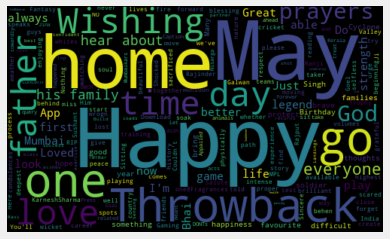

In [38]:
# Now see how well this sentiments are distributed by plotting a wordcloud/textxloud

allWords= ' '.join( [twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')


#turning off axis
plt.axis('off')        
plt.show()

In [39]:
#function to compute -ve , +ve, neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    

#add this now in our data as col
#to see whether tweetis positive or negative
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Do try this at home! 😄 \n one8Fragrances,0.000000,0.0000,Neutral
1,Loved this moving story told in a brilliant wa...,0.900000,0.8000,Positive
2,Nothing comes close to playing an intense game...,0.675000,0.1000,Positive
3,Here's what I'm doing when I'm not training. G...,0.450000,0.4500,Positive
4,Throwback to when you could go to such beautif...,0.781250,0.3375,Positive
5,We've lost a legend in Rajinder Goel Ji. Him b...,0.800000,0.7000,Positive
6,"This father's day, I urge you all to be gratef...",0.688571,0.0600,Positive
7,Great weather in Mumbai. Sitting out enjoying ...,0.456667,0.4100,Positive
8,Salute and deepest respect to the soldiers who...,0.750000,0.3250,Positive
9,Shocked to hear about Sushant Singh Rajput. Th...,0.900000,-0.6000,Negative


In [40]:
#print all positive tweets----->  sort data by polarity


k=1     #iteration in front of a tweet
sortDataSet=df.sort_values(by=['Polarity'])     #sort data by polarity

for i in range(0, sortDataSet.shape[0]):
    if (sortDataSet['Analysis'][i]=='Positive'):
        print(str(k) + ')' +sortDataSet['Tweets'][i])
        k=k+1
    


1)Loved this moving story told in a brilliant way. Bhai behen on fire  KarneshSharma 😃❤️. Out now, please don't miss it guys.  
2)Nothing comes close to playing an intense game in whites. What a blessing to be able to play test cricket for India. 🇮🇳💙 
3)Here's what I'm doing when I'm not training. Gaming on the MPL App! 🤓 Play all your favourites out of more than 40 games available on the app and don't forget to create your Fantasy teams on  as well. 👊🏼 Download now from  
4)Throwback to when you could go to such beautiful spots in nature. Just to be able to sit together and just soak it all in. With my one and only ❤️❤️❤️ 
5)We've lost a legend in Rajinder Goel Ji. Him being the highest wicket-taker in the history of Ranji Trophy, speaks volumes about the career he had. Wishing all the strength to his family and loved ones. 🙏🏼
6)This father's day, I urge you all to be grateful for the love of your father but always look for your own path to move forward in life. You'll never have to l

In [41]:
#print negative tweets


k=1     #iteration in front of a tweet
sortDataSet=df.sort_values(by=['Polarity'] , ascending='False')     #sort data by polarity

for i in range(0, sortDataSet.shape[0]):
    if (sortDataSet['Analysis'][i]=='Negative'):
        print(str(k) + ')' +sortDataSet['Tweets'][i])
        k=k+1

1)Shocked to hear about Sushant Singh Rajput. This is so difficult to process. May his soul RIP and may god give all the strength to his family and friends 🙏
2)Appalled to hear about what happened in Kerala. Let's treat our animals with love and bring an end to these cowardly acts. 


In [32]:
#print neural tweets


k=1     #iteration in front of a tweet
sortDataSet=df.sort_values(by=['Polarity'] , ascending='False')     #sort data by polarity

for i in range(0, sortDataSet.shape[0]):
    if (sortDataSet['Analysis'][i]=='Neural'):
        print(str(k) + ')' +sortDataSet['Tweets'][i])
        k=k+1

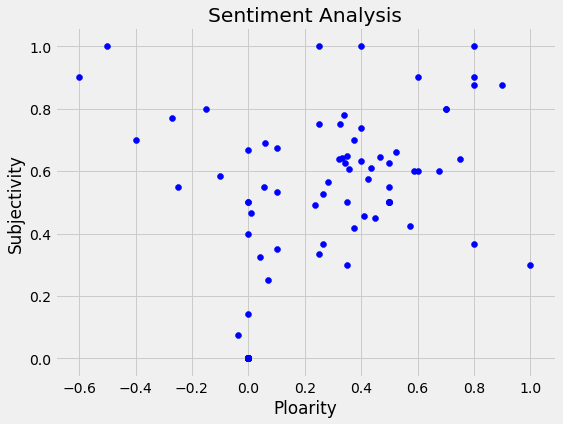

In [28]:
#plot polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Ploarity')
plt.ylabel('Subjectivity')
plt.show()

In [29]:
#get percentage of positive tweet

Postive_tweet_per= df[df.Analysis == 'Positive']
Postive_tweet_per= Postive_tweet_per['Tweets']
round((Postive_tweet_per.shape[0]/df.shape[0])*100)

56

In [30]:
#get percentage of Negative tweet

Postive_tweet_per= df[df.Analysis == 'Negative']
Postive_tweet_per= Postive_tweet_per['Tweets']
round((Postive_tweet_per.shape[0]/df.shape[0])*100)

8

In [31]:
#get percentage of positive tweet

Postive_tweet_per= df[df.Analysis == 'Neural']
Postive_tweet_per= Postive_tweet_per['Tweets']
round((Postive_tweet_per.shape[0]/df.shape[0])*100)

0